In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [17]:
# 자치구 뽑아올데이터
gu_data = pd.read_csv('../data/공공자전거대여소정보수정2212.csv', encoding='ansi', )
gu_data.columns =['대여소번호','대여소명','자치구','상세주소','위도','경도','설치시기','거치대수1','거치대수2','운영방식']
gu_data

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,거치대수1,거치대수2,운영방식
0,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,NaN,11.0,QR
1,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 새문안로 82 광화문S타워 앞,37.569969,126.973938,2015-10-07,NaN,31.0,QR
2,305,종로구청 옆,종로구,서울특별시 종로구 새문안로 102-2 가로판매대,37.569962,126.976158,2015-10-07,NaN,13.0,QR
3,307,서울역사박물관 앞,종로구,서울특별시 종로구 삼청로 30 국립현대미술관 서울관,37.579708,126.980858,2015-10-07,NaN,10.0,QR
4,308,광화문 S타워 앞,종로구,서울특별시 종로구 종로 47 종각역 1번출구 앞,37.570396,126.981789,2015-10-07,NaN,8.0,QR
...,...,...,...,...,...,...,...,...,...,...
2710,3691,둔촌역 2번출구,강동구,강동구 명일동 303-7,37.551426,127.144211,2022-06-20,NaN,6.0,QR
2711,3692,둔촌오륜역 1번 출구,강동구,강동구 상일동 520-1,37.556553,127.165878,2022-06-21,NaN,15.0,QR
2712,3694,강동리엔파크 13단지(1303동 앞),강동구,강동구 천호동 250-7,37.548164,127.122574,2022-07-08,NaN,8.0,QR
2713,3698,명일역 3번출구 옆,강동구,강동구 둔촌동 118-2,37.523281,127.146133,2022-10-12,NaN,8.0,QR


In [31]:
# 대여소 개수확인 
gu_data['대여소명'].unique().shape

(2714,)

In [18]:
# 자치구 개수확인
gu_data['자치구'].unique().shape

(25,)

In [19]:
# 대여소 고유번호를 이용해 자치구 삽입
dataset1 = gu_data[['대여소번호','자치구']]
dataset1

,대여소번호,자치구
0,302,종로구
1,303,종로구
2,305,종로구
3,307,종로구
4,308,종로구
...,...,...
2710,3691,강동구
2711,3692,강동구
2712,3694,강동구
2713,3698,강동구


In [11]:
# 22년 6월 데이터
df_06 = pd.read_csv(r'../data/서울특별시 공공자전거 이용정보(시간대별)_22.06.csv',encoding = 'ansi')
df_06

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,NaN,~10대,1,48.30,0.46,1999.70,10
1,2022-06-01,0,2059,2059. 보라매공원 정문,정기권,NaN,~10대,1,27.47,0.23,991.00,9
2,2022-06-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,20.63,0.20,868.17,3
3,2022-06-01,0,750,750. 연의근린공원 건너편,정기권,NaN,~10대,1,13.97,0.13,560.00,4
4,2022-06-01,0,755,755. 목동1단지아파트 상가 앞,정기권,NaN,~10대,1,12.15,0.14,590.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3704323,2022-06-30,23,4765,4765. 동대문디자인플라자,정기권,M,기타,1,30.12,0.27,1170.00,65
3704324,2022-06-30,23,4813,4813. 망우지구대,정기권,M,기타,1,63.65,0.65,2820.00,18
3704325,2022-06-30,23,4564,4564. 63스퀘어,정기권,M,기타,1,65.64,0.51,2210.00,15
3704326,2022-06-30,23,263,263. 근로자회관 사거리,정기권,M,기타,1,38.81,0.23,980.00,16


In [12]:
# 9월 데이터
df_09 = pd.read_csv(r'../data/서울특별시 공공자전거 이용정보(시간대별)_22.09.csv',encoding = 'ansi')
df_09

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-09-01,0,1665,1665. 양지근린공원앞,정기권,NaN,~10대,1,18.79,0.17,730.00,3
1,2022-09-01,0,1669,1669. 중계역 3번출구,정기권,NaN,~10대,1,36.41,0.40,1735.03,11
2,2022-09-01,0,1165,1165. 마곡중학교 후문,정기권,NaN,~10대,1,0.00,0.00,0.00,1
3,2022-09-01,0,764,764. 목동청소년수련관,정기권,NaN,~10대,1,27.95,0.22,941.14,6
4,2022-09-01,0,3533,3533. 건대입구역 사거리(롯데백화점),정기권,NaN,~10대,1,61.05,0.55,2371.67,20
...,...,...,...,...,...,...,...,...,...,...,...,...
4100679,2022-09-30,23,1911,1911. 구로디지털단지역 앞,정기권,M,기타,1,69.46,0.53,2277.98,19
4100680,2022-09-30,23,2102,2102. 봉림교 교통섬,정기권,M,기타,1,17.01,0.17,740.80,3
4100681,2022-09-30,23,2337,2337. 대모산입구역 2번출구 앞,정기권,M,기타,1,16.12,0.14,598.60,3
4100682,2022-09-30,23,1414,1414. 사가정역 2번출구,정기권,M,기타,1,103.34,0.71,3070.00,19


In [13]:
df_06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704328 entries, 0 to 3704327
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 339.1+ MB


In [14]:
df_09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100684 entries, 0 to 4100683
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 375.4+ MB


In [15]:
# 데이터합치기
datatotal=pd.concat([df_06,df_09],ignore_index=True)
datatotal

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,NaN,~10대,1,48.30,0.46,1999.70,10
1,2022-06-01,0,2059,2059. 보라매공원 정문,정기권,NaN,~10대,1,27.47,0.23,991.00,9
2,2022-06-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,20.63,0.20,868.17,3
3,2022-06-01,0,750,750. 연의근린공원 건너편,정기권,NaN,~10대,1,13.97,0.13,560.00,4
4,2022-06-01,0,755,755. 목동1단지아파트 상가 앞,정기권,NaN,~10대,1,12.15,0.14,590.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...
7805007,2022-09-30,23,1911,1911. 구로디지털단지역 앞,정기권,M,기타,1,69.46,0.53,2277.98,19
7805008,2022-09-30,23,2102,2102. 봉림교 교통섬,정기권,M,기타,1,17.01,0.17,740.80,3
7805009,2022-09-30,23,2337,2337. 대모산입구역 2번출구 앞,정기권,M,기타,1,16.12,0.14,598.60,3
7805010,2022-09-30,23,1414,1414. 사가정역 2번출구,정기권,M,기타,1,103.34,0.71,3070.00,19


In [20]:
# 데이터에 대여소번호를 이용하여 자치구합침
m_data = pd.merge(datatotal, dataset1, on='대여소번호')
m_data

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),자치구
0,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,NaN,~10대,1,48.30,0.46,1999.70,10,양천구
1,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,M,40대,1,59.47,0.41,1787.89,6,양천구
2,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,M,50대,1,26.61,0.22,960.00,5,양천구
3,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,일일권,F,~10대,1,13.79,0.12,535.83,3,양천구
4,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,일일권,M,50대,1,22.69,0.20,855.01,5,양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7726065,2022-09-30,20,4274,4274. 신촌 파랑고래 입구,정기권,M,20대,1,82.18,0.60,2593.96,21,마포구
7726066,2022-09-30,21,4274,4274. 신촌 파랑고래 입구,정기권,F,20대,1,17.32,0.20,857.55,6,마포구
7726067,2022-09-30,21,4274,4274. 신촌 파랑고래 입구,정기권,F,20대,1,27.23,0.29,1250.00,8,마포구
7726068,2022-09-30,22,4274,4274. 신촌 파랑고래 입구,정기권,F,30대,2,115.30,1.53,6597.39,80,마포구


In [23]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7726070 entries, 0 to 7726069
Data columns (total 13 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
 12  자치구      object 
dtypes: float64(1), int64(4), object(8)
memory usage: 825.2+ MB


In [24]:
# total 대여위치의 자치구 카운팅 
c_data = m_data['자치구'].value_counts()
c_data

강서구     811988
송파구     703310
영등포구    603589
노원구     451818
양천구     446087
마포구     405499
광진구     354218
강동구     348395
구로구     295428
성동구     287805
동대문구    271611
서초구     258027
종로구     257537
강남구     247789
중랑구     236558
은평구     215653
관악구     211908
성북구     197228
중구      183345
용산구     178775
도봉구     172887
동작구     171569
서대문구    166933
금천구     125039
강북구     123074
Name: 자치구, dtype: int64

In [26]:
# total 가장많이 대여한 대여소 
total_data1 = m_data[['대여소명','자치구']]
total_data1.value_counts()

대여소명                     자치구 
4217. 한강공원 망원나들목         마포구     20503
502. 뚝섬유원지역 1번출구 앞       광진구     19677
2715.마곡나루역 2번 출구         강서구     18607
207. 여의나루역 1번출구 앞        영등포구    18457
2102. 봉림교 교통섬            관악구     17725
                                 ...  
3527. 왕십리 자이아파트          성동구        77
4314. 탑성마을 버스정거장 옆       서초구        66
3538. 서울숲 IT캐슬           성동구        62
4274. 신촌 파랑고래 입구         마포구        57
2391. 구룡터널 입구(개포1단지아파트)  강남구        22
Length: 2687, dtype: int64

<Figure size 1600x700 with 0 Axes>

<AxesSubplot:xlabel='대여횟수', ylabel='자치구'>

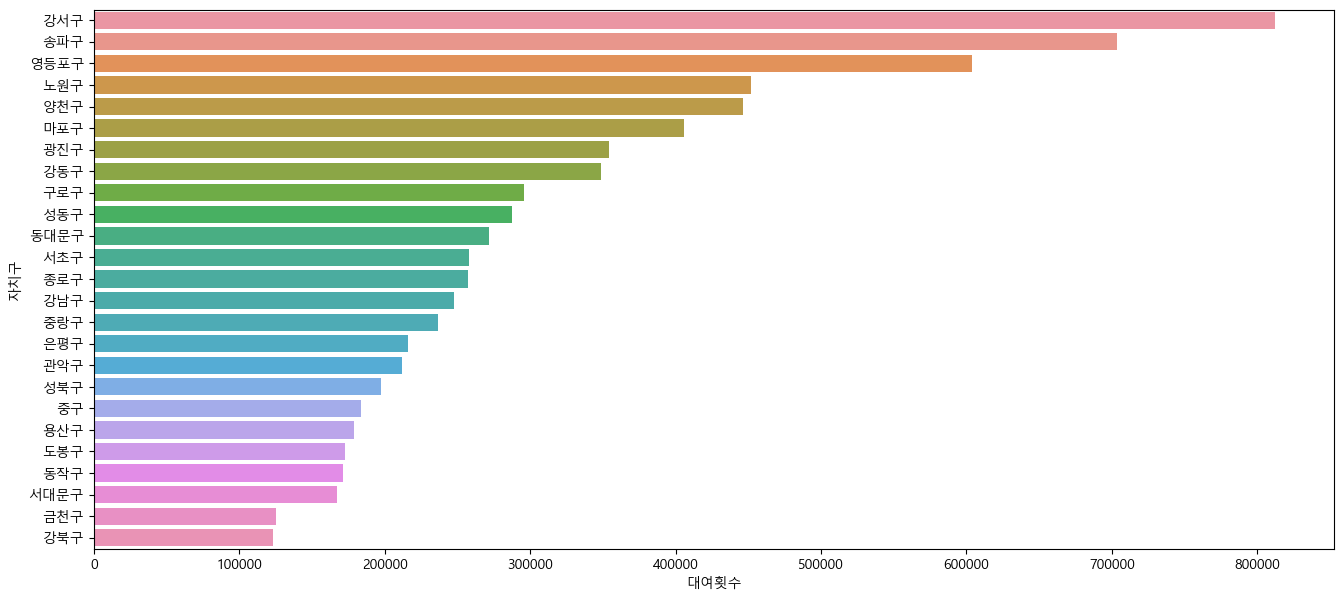

In [27]:
# total 자치구별 대여횟수 시각화 
total_p=pd.DataFrame(c_data)
total_p.columns=['대여횟수']
total_p['자치구'] = total_p.index
plt.figure(figsize = (16, 7))
sns.barplot(data = total_p, x ='대여횟수', y = '자치구')
plt.show()

In [28]:
# 자치구 별 대여소갯수
a_area =pd.DataFrame(dataset1['자치구'].value_counts()) 
a_area.columns=['대여소 개수']
a_area.index.names = ["자치구"]
a_area['자치구'] = a_area.index

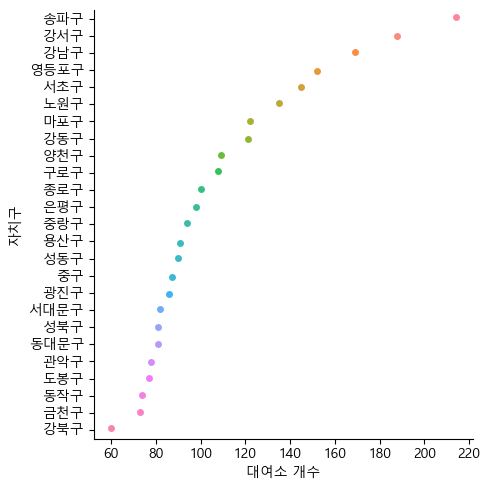

In [29]:
# 대여소개수 시각화
sns.catplot(data=a_area,x='대여소 개수', y='자치구')
plt.show()

In [30]:
# 20대가 많이 사용하는 대여소의 자치구 
m_data[['연령대코드','자치구']].dropna().value_counts()

연령대코드  자치구 
20대    강서구     247717
       송파구     236029
30대    강서구     199503
20대    영등포구    190949
30대    송파구     176265
                ...  
70대이상  서대문구       721
       강북구        663
       용산구        529
       금천구        457
       동작구        448
Length: 200, dtype: int64